# Convert analytic satellite image, plot and save figure
Exemplary code showing usage of function convert_sat_img

In [1]:
import numpy as np
import pandas as pd
import rasterio 
from src.models.data import *
from src.visualization.visualize_satimg import convert_sat_img, define_band_colors, get_band_properties
from matplotlib import pyplot as plt
import os, sys
%load_ext autoreload
%autoreload 2
%matplotlib inline

Using TensorFlow backend.


## User settings

In [2]:
# source path
img_source_dir = "/media/hh/hd_internal/_data_DS/DSR/satelliteImages/Borneo/3093/"
# source file name
img_source_fn = "20180427_020348_103a_3B_AnalyticMS.tif"
# type of file (ordering of bands)
src_type = "BGRN"
# row and column indexes of excerpt
r1, r2, c1, c2 = 1000, 1700, 4000, 4800
#r1, r2, c1, c2 = 500, 2700, 3000, 4800

# output format of graphics file (set to None to suppress)
img_out_format = "png"
img_out_format = None

img_out_dir = "/media/hh/hd_internal/hh/DSR_Berlin_2018/roaddetection/not_for_distribution/presentations/images/"
img_out_fn = "exemplary_scene_Borneo_01"

# input args for convert_sat_img:
# - set to True if PCA-based false color images are to be computed and displayed
pca = True
# list all types of scaling that are supposed to take place
scaling_type = ["percentile", "equalize_adapthist"]
#scaling_type = ["percentile"]
#scaling_type = ["equalize_adapthist"]

do_scale_bands_separate = True
# percentile; values above it will be clipped if method "percentile" is in scaling_type
percentile=99.9
# clip limit for equalize_adapthist - default 0.03; the higher the value, the brighter the image
clip_limit=0.01

# graphics defaults
figsize = (10,10)
plt.rcParams["figure.figsize"] = figsize

In [3]:
# open dataset
src = rasterio.open(os.path.join(img_source_dir, img_source_fn))
# read all data into numpy array; notes:
# - the bands are in the first dimension
# - we might also read using a window
# - reading the image as a masked array does not make sense because function convert_sat_img
#   uses sklearn for image manipulation, which ignores masked arrays, hence we need the
#   an explicit mask array
img_full = src.read(masked=False)
mask_full = src.read_masks()

In [4]:
# cut down to desired excerpt
img_arr = img_full[:, r1:r2, c1:c2]
if mask_full is not None:
    mask_arr = mask_full[:, r1:r2, c1:c2]
else:
    mask_arr = None

In [5]:
# inspect properties of bands in image
band_info = get_band_properties(src, src_type, define_band_colors())
band_info

,band_index,plot_col,dtype,maxval,nodatavals
name,,,,,
B,1,blue,uint16,65535,0.0
G,2,green,uint16,65535,0.0
R,3,red,uint16,65535,0.0
N,4,black,uint16,65535,0.0


/home/hh/anaconda3/envs/geo/lib/python3.6/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))


explained variance: [0.56545699 0.42291953 0.00792714]


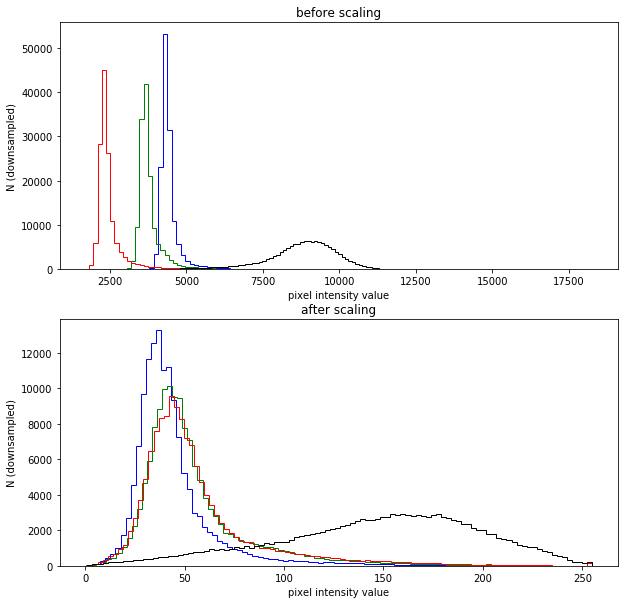

In [6]:
# call conversion function with histogram plotting functionality on
if pca:
    img_rgb, img_n, img_nrg, img_npc, pca = convert_sat_img(img_arr, src,
                                                            src_type=src_type,
                                                            mask_arr=mask_arr,
                                                            pca=pca,
                                                            scaling_type=scaling_type, 
                                                            do_scale_bands_separate=do_scale_bands_separate,
                                                            percentile=percentile,
                                                            clip_limit=clip_limit,
                                                            do_histogram=True)
else:
    img_rgb, img_n, img_nrg = convert_sat_img(img_arr, src,
                                            src_type=src_type,
                                            mask_arr=mask_arr,
                                            pca=pca,
                                            scaling_type=scaling_type, 
                                            do_scale_bands_separate=do_scale_bands_separate,
                                            percentile=percentile,
                                            clip_limit=clip_limit,
                                            do_histogram=True)

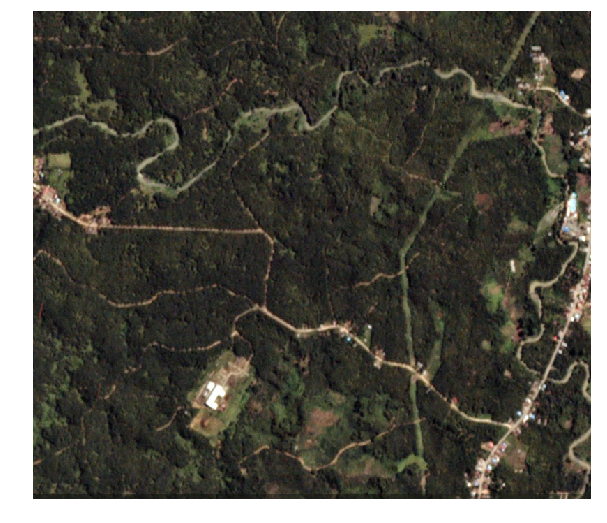

In [7]:
# plot rgb image
figH = plt.figure(figsize=figsize)
axH = plt.axes()
plt.imshow(img_rgb)
axH.axis("off");
if img_out_format:
    plt.savefig(os.path.join(img_out_dir, img_out_fn + "." + img_out_format), orientation='portrait')

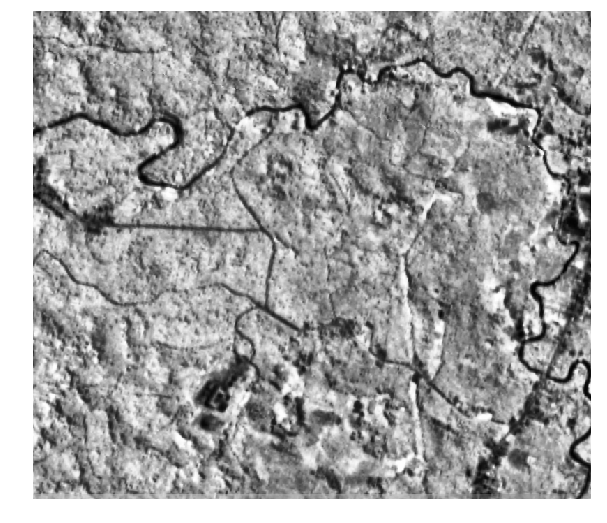

In [8]:
# plot infrared band only
fig = plt.figure(figsize=figsize)
axH = plt.axes()
plt.imshow(img_n, cmap="gray")
axH.axis("off");
    

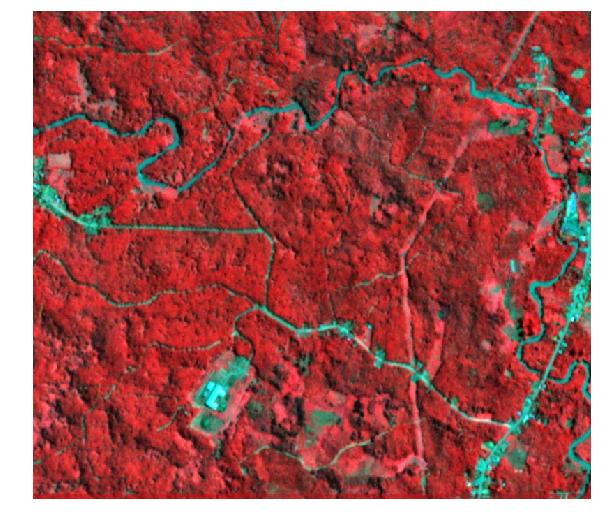

In [9]:
# plot NRG image (infrared appears red, red as green, and green as blue)
fig = plt.figure(figsize=figsize)
axH = plt.axes()
plt.imshow(img_nrg)
axH.axis("off");
if img_out_format:
    plt.savefig(os.path.join(img_out_dir, img_out_fn + "_falsecolor." + img_out_format), orientation='portrait')

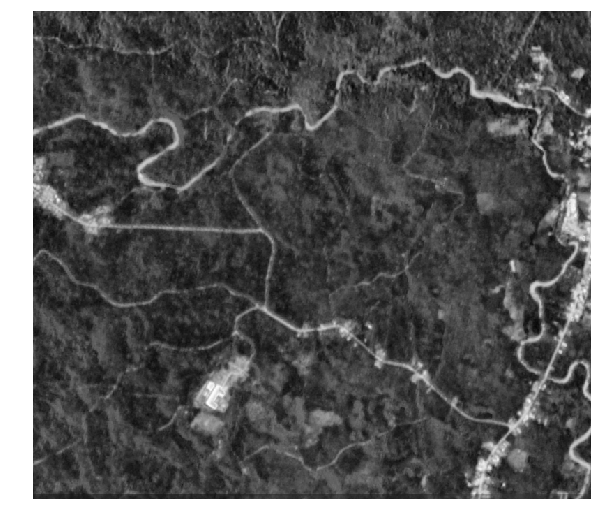

In [10]:
# plot grayscale image of first principal component
if pca:
    figH = plt.figure(figsize=figsize)
    axH = plt.axes()
    plt.imshow(img_npc[:,:,0], cmap="gray")
    axH.axis("off");
    if img_out_format:
        plt.savefig(os.path.join(img_out_dir, img_out_fn + "_pca1" + "." + img_out_format), orientation='portrait')

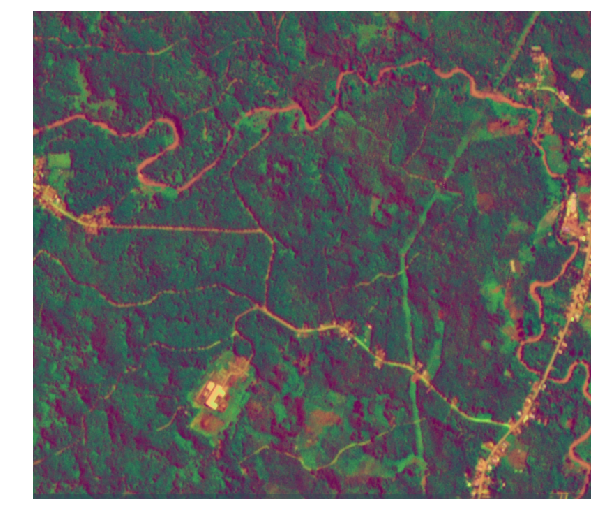

In [11]:
# plot PCA-based false-color image
if pca:
    figH = plt.figure(figsize=figsize)
    axH = plt.axes()
    plt.imshow(img_npc)
    axH.axis("off");
    if img_out_format:
        plt.savefig(os.path.join(img_out_dir, img_out_fn + "_pca" + "." + img_out_format), orientation='portrait')

/home/hh/anaconda3/envs/geo/lib/python3.6/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))


explained variance: [0.56584177 0.42008357 0.00949663]


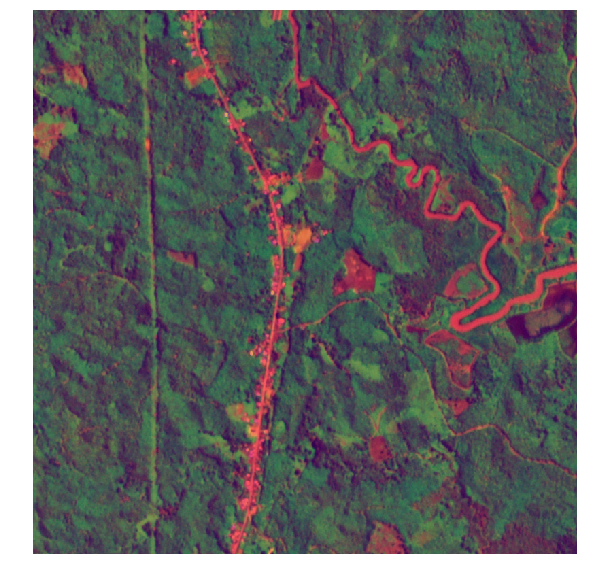

In [12]:
# produce PCA-based false-color image of another excerpt, but using the same PC
# as computed above
if pca:
    _, _, _, img_npc_other, _ = convert_sat_img(img_full[:, r2:r2+800, c1+400:c2+400], src,
                                                src_type=src_type,
                                                mask_arr=mask_full[:, r2:r2+800, c1+400:c2+400],
                                                pca=pca,
                                                scaling_type=scaling_type, 
                                                do_scale_bands_separate=do_scale_bands_separate,
                                                percentile=percentile,
                                                clip_limit=clip_limit)

    figH = plt.figure(figsize=figsize)
    axH = plt.axes()
    plt.imshow(img_npc_other)
    axH.axis("off");
    if img_out_format:
        plt.savefig(os.path.join(img_out_dir, img_out_fn + "_pca_other" + "." + img_out_format), orientation='portrait')